In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import nbimporter
import performance_measure

Importing Jupyter notebook from performance_measure.ipynb


### Splitting dataset into training and testing set

In [2]:
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12, stratify=y)
    return X_train, X_test, y_train, y_test

### Building the model (multikernal SVM)

In [3]:
def train_rf_model(X_train,y_train, X_test):
    # 
    rf = SVC(kernel='poly', gamma='auto', random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred

### Testing with toy dataset from sklearn

In [4]:
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)

In [7]:
def get_model(X,y):
    print('Loading...')
    X_train, X_test, y_train, y_test = split_data(X,y)
    print('Training...')
    rf, y_train_pred, y_test_pred = train_rf_model(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return
    

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.89473684 0.10526316]
 [0.         0.         1.        ]]


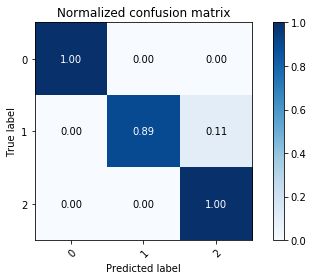

Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 1.000 		 1.000 		 1.000
1                         	 1.000 		 0.895 		 0.944
2                         	 0.895 		 1.000 		 0.944


In [8]:
get_model(X,y)

In [9]:
X.shape

(178, 13)